<a href="https://colab.research.google.com/github/Nighatakhtar/ALL-Healthy/blob/master/Healthy_or_ALL_IDB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##get access google drive data into google colab 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/Research-2020/ALL_IDB1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#!pip install -q keras


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
import pandas as pd
import os

In [0]:
image_data = Path('/content/ALL_IDB1/im')

In [0]:
image_data.ls()

[PosixPath('/content/ALL_IDB1/im/TRAIN'),
 PosixPath('/content/ALL_IDB1/im/TEST')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(image_data, train='TRAIN', valid='TEST', size = 128, bs=32, num_workers=0).normalize(imagenet_stats)

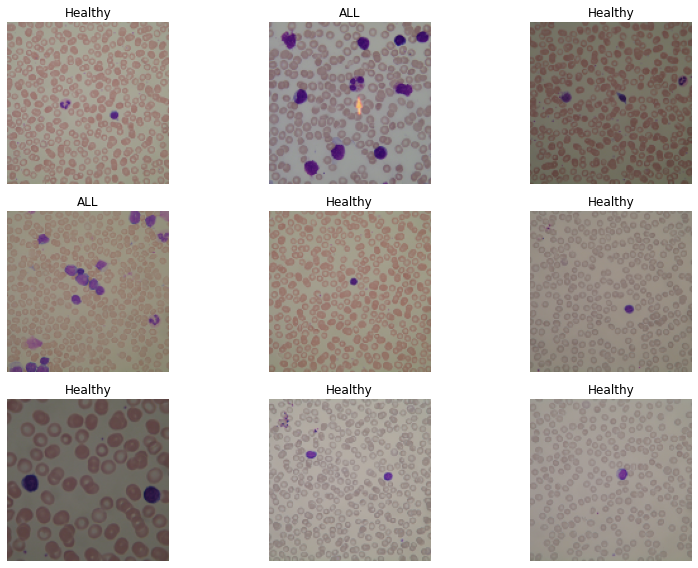

In [0]:
data.show_batch(rows=3, figsize=(12,8))

In [0]:
model_path=Path('/tmp/models/')
learn = cnn_learner(data, models.resnet34, metrics = error_rate, model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


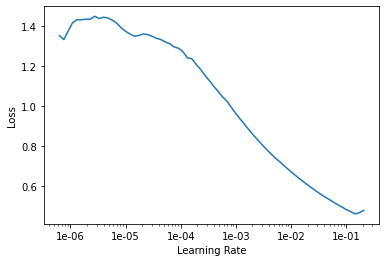

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.855217,0.799770,0.400000,00:11
1,0.446782,0.154636,0.100000,00:11
2,0.291887,0.068383,0.050000,00:11
3,0.242707,0.063745,0.050000,00:11
4,0.190390,0.021275,0.000000,00:11


In [0]:
learn.save("stage-1")

In [0]:
learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (88 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Valid: LabelList (20 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


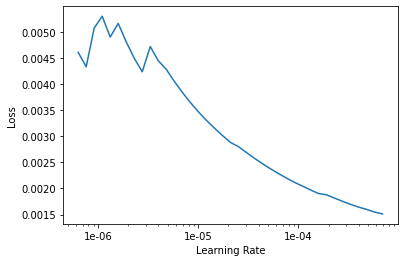

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr = slice((1e-4)/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.000171,0.001441,0.000000,00:11
1,0.000254,0.000318,0.000000,00:11
2,0.000274,0.000098,0.000000,00:10
3,0.000206,0.000055,0.000000,00:10
4,0.001793,0.000047,0.000000,00:11


In [0]:
learn.save("stage-2")

In [0]:
learn.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (88 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Valid: LabelList (20 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(image_data, train = 'TRAIN', valid = 'TEST',size = 240, bs=16, num_workers=0).normalize(imagenet_stats)

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 240, 240])

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


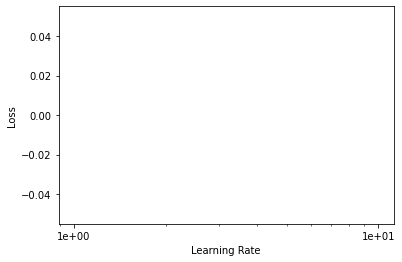

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.163597,0.202019,0.100000,00:14
1,0.254756,0.097486,0.050000,00:14


In [0]:
learn.save("stage-3")

In [0]:
learn.load("stage-3")

Learner(data=ImageDataBunch;

Train: LabelList (88 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Valid: LabelList (20 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
ALL,ALL,ALL,ALL,ALL
Path: /content/ALL_IDB1/im;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


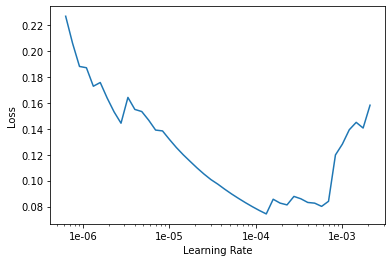

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.550766,324.823700,0.450000,00:14
1,1.600422,1428.230103,0.550000,00:14


In [0]:
learn.save("stage-4")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

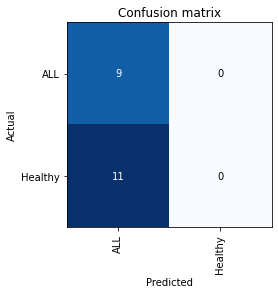

In [0]:
interp.plot_confusion_matrix(figsize = (4,4))